In [1]:
import pandas as pd

In [2]:
seed = pd.read_csv('/content/seeds_dataset (2).csv')

In [3]:
#REMOVE LAST TWO COLUMNS
seed = seed.iloc[:,:-2]

In [4]:
seed.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
seed.isnull().sum()

,0
Area,0
Perimeter,0
Compactness,0
Length of kernel,0
Width of kernel,0
Asymmetry coefficient,0
Length of kernel groove,0
"Class (1, 2, 3)",0


In [6]:
X = seed.drop('Class (1, 2, 3)', axis = 1)
Y = seed['Class (1, 2, 3)']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [8]:
from sklearn.svm import SVC
model = SVC(kernel = 'poly')
model.fit(X_train, Y_train)

SVC(kernel='poly')

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9524


In [12]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 3, 2, 3, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 3, 3])

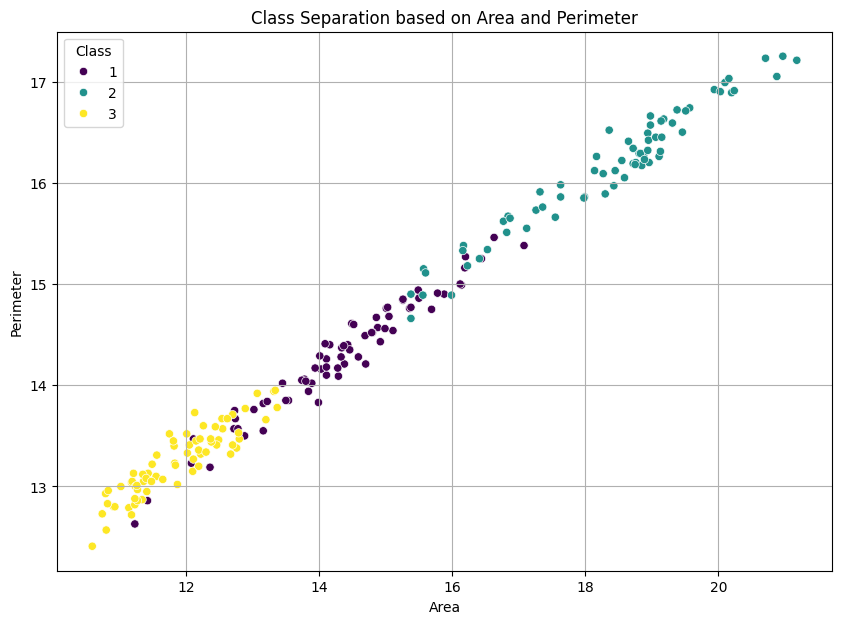

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# VISUALIZATION OF CLASSES
plt.figure(figsize=(10, 7))
sns.scatterplot(data=seed, x='Area', y='Perimeter', hue='Class (1, 2, 3)', palette='viridis')
plt.title('Class Separation based on Area and Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Class')
plt.grid(True)
plt.show()